# KPMG Virtual Internship on Data Analysis

In [50]:
#Importing requied packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Packages have been imported ✓')

Packages have been imported ✓


##### Now, let's import the datasets

In [51]:
txn = pd.read_csv('/content/transactions.csv',header=1)
cust_add = pd.read_csv('/content/customer_address.csv',header=1)
new_cust = pd.read_csv('/content/new_customers.csv',header=1)
cust_demo = pd.read_csv('/content/customer_demographics.csv',header=1)
print('Datasets have been imported ✓')

Datasets have been imported ✓


### 1.1 Transaction Data

In [52]:
txn.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,2,2950,25-02-17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
drop_cols = txn.loc[:,'Unnamed: 13':].columns.to_list()
txn.drop(labels=drop_cols,axis=1,inplace=True)

In [54]:
def check_shape(dataframe):
  rows = dataframe.shape[0]
  cols = dataframe.shape[1]
  print('Dataset: \nNumber of Records: {}\nNumber of Columns: {}'.format(rows,cols))

In [55]:
check_shape(txn)

Dataset: 
Number of Records: 20000
Number of Columns: 13


In [56]:
txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [57]:
# Count of unique customer ids
print(len(txn.customer_id.unique()))

txn.describe()

3494


,transaction_id,product_id,customer_id,list_price,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,38199.776549
std,5773.647028,30.75359,1011.951046,582.825242,2875.201110
min,1.000000,0.00000,1.000000,12.010000,33259.000000
25%,5000.750000,18.00000,857.750000,575.270000,35667.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,38216.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,40672.000000
max,20000.000000,100.00000,5034.000000,2091.470000,42710.000000


In [58]:
obj_cols = txn.select_dtypes(np.object).columns.to_list()

In [59]:
for col in obj_cols:
  print('Column Name: ',col,'\n')
  print('---------------------------------------')
  print(txn[col].value_counts())
  print('---------------------------------------')

Column Name:  transaction_date 

---------------------------------------
14-02-17    82
18-08-17    82
15-10-17    76
31-01-17    73
19-12-17    71
            ..
29-08-17    38
07-12-17    37
29-03-17    36
25-09-17    35
19-10-17    32
Name: transaction_date, Length: 364, dtype: int64
---------------------------------------
Column Name:  online_order 

---------------------------------------
True     9829
False    9811
Name: online_order, dtype: int64
---------------------------------------
Column Name:  order_status 

---------------------------------------
Approved     19821
Cancelled      179
Name: order_status, dtype: int64
---------------------------------------
Column Name:  brand 

---------------------------------------
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64
---------------------------------------
Column Name:  product_line 

---------------------------

Cost should have been a numeric column, because of currency symbol it is Object

In [60]:
null_cols = txn.isnull().sum().to_frame('Count')
#null_cols[null_cols.Count>0].shape[0]

There are 7 columns out of 13 with missing values

In [61]:
int_cols  = txn.select_dtypes(np.int).columns.to_list()
txn[int_cols].describe()

,transaction_id,product_id,customer_id
count,20000.000000,20000.00000,20000.000000
mean,10000.500000,45.36465,1738.246050
std,5773.647028,30.75359,1011.951046
min,1.000000,0.00000,1.000000
25%,5000.750000,18.00000,857.750000
50%,10000.500000,44.00000,1736.000000
75%,15000.250000,72.00000,2613.000000
max,20000.000000,100.00000,5034.000000


In [62]:
float_cols  = txn.select_dtypes(np.float).columns.to_list()
txn[float_cols].describe()

,list_price,product_first_sold_date
count,20000.000000,19803.000000
mean,1107.829449,38199.776549
std,582.825242,2875.201110
min,12.010000,33259.000000
25%,575.270000,35667.000000
50%,1163.890000,38216.000000
75%,1635.300000,40672.000000
max,2091.470000,42710.000000


Values in the product_first_sold_date column are invalid

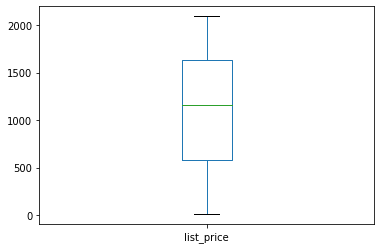

In [63]:
txn.list_price.plot.box()

In [64]:
txn.transaction_date = pd.to_datetime(txn.transaction_date)

In [65]:
txn.transaction_date = pd.to_datetime(txn.transaction_date)
txn['year'] = txn['transaction_date'].dt.year
txn['month'] = txn['transaction_date'].dt.month
txn['date'] = txn['transaction_date'].dt.day

In [66]:
print(len(txn.date.value_counts()))
txn.year.value_counts()

31


2017    20000
Name: year, dtype: int64

In [67]:
txn.month.value_counts()

8     1786
10    1748
1     1690
11    1689
7     1681
5     1679
3     1652
12    1636
9     1621
2     1608
4     1606
6     1604
Name: month, dtype: int64

In [68]:
txn.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
year                         0
month                        0
date                         0
dtype: int64

In [69]:
txn.dropna(axis=0,inplace=True)

In [70]:
check_shape(txn)

Dataset: 
Number of Records: 19445
Number of Columns: 16


In [71]:
cust_ids_t = txn.customer_id.value_counts().to_frame('Count')
cust_ids_t[cust_ids_t.Count==1].sum()

Count    61
dtype: int64

### 1.2 Customer Address

In [72]:
cust_add.head(3)

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
cust_ids = cust_add.customer_id.value_counts().to_frame('Count')
cust_ids[cust_ids.Count==1].count()

Count    3999
dtype: int64

In [74]:
drop_cols_CA = cust_add.loc[:,'Unnamed: 6':].columns.to_list()
cust_add.drop(labels=drop_cols_CA,axis=1,inplace=True)

In [75]:
cust_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [76]:
len(cust_add.customer_id.unique())

3999

In [77]:
cust_add.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [78]:
cust_add.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

### 1.3 Customer Demographics

In [79]:
cust_demo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
drop_cols_CD = cust_demo.loc[:,'Unnamed: 13':].columns.to_list()
cust_demo.drop(labels=drop_cols_CD,axis=1,inplace=True)

In [81]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [82]:
len(cust_demo.customer_id.unique())

4000

In [95]:
obj_cols_CD = cust_demo.select_dtypes(np.object).columns.to_list()
for col in obj_cols_CD:
  print('Column Name: ',col,'\n')
  print('---------------------------------------')
  print(cust_demo[col].value_counts())
  print('---------------------------------------')

Column Name:  gender 

---------------------------------------
F    1483
M    1381
U       1
Name: gender, dtype: int64
---------------------------------------
Column Name:  job_title 

---------------------------------------
Social Worker                   42
Sales Representative            38
Dental Hygienist                37
Chemical Engineer               37
Cost Accountant                 36
                                ..
Human Resources Assistant IV     2
Programmer Analyst IV            2
Accounting Assistant IV          2
Database Administrator II        1
Developer I                      1
Name: job_title, Length: 195, dtype: int64
---------------------------------------
Column Name:  job_industry_category 

---------------------------------------
Manufacturing         695
Financial Services    682
Health                543
Retail                305
Property              231
IT                    127
Entertainment         122
Argiculture            99
Telecommunications  

- Gender column has inconsistent values
- default column has invalid data
- DOB should be a datetime column / timestamp

In [84]:
null_cols_CD = cust_demo.isnull().sum().to_frame('Count')
null_cols_CD[null_cols_CD.Count>0].shape[0]

6

There are 6 columns in the customer demographics datasets

In [85]:
cust_ids_CD = cust_demo.customer_id.value_counts().to_frame('Count')
#cust_ids_CD[cust_ids_CD.Count>1]
cust_ids_CD

,Count
2047,1
657,1
2732,1
681,1
2728,1
...,...
3371,1
1322,1
3367,1
1318,1


In [86]:
cust_demo.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [87]:
cust_demo.shape

(4000, 13)

In [88]:
cust_demo.drop(labels=['first_name','last_name','default'],axis=1,inplace=True)

In [89]:
cust_demo['tenure'].fillna(value='mean',inplace=True)

In [90]:
cust_demo['DOB'].value_counts()

1978-01-30    7
1978-08-19    4
1976-09-25    4
1977-05-13    4
1964-07-08    4
             ..
1995-01-24    1
1981-03-10    1
1973-01-05    1
1975-03-26    1
1986-08-29    1
Name: DOB, Length: 3448, dtype: int64

In [96]:
cust_demo.DOB = pd.to_datetime(cust_demo.DOB)
cust_demo['DOB_year'] = cust_demo['DOB'].dt.year.astype(int)
cust_demo['DOB_month'] = cust_demo['DOB'].dt.month.astype(int)
cust_demo['DOB_date'] = cust_demo['DOB'].dt.day.astype(int)

In [92]:
cust_demo.dropna(axis=0,inplace=True)

In [93]:
# Let's fix data issues in Gender column
cust_demo['gender'] = cust_demo['gender'].map({'Male':'M','Female':'F','Femal':'F','F':'F','U':'U'})

In [98]:
cust_demo['Age'] = 2021 - cust_demo['DOB_year']

In [140]:
cust_demo = cust_demo[(cust_demo["deceased_indicator"] != 'Y') & (cust_demo["Age"] != 178)]

In [106]:
cust_demo.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,DOB_year,DOB_month,DOB_date,Age,Age_Group
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,1953,10,12,68,61-70
1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,1980,12,16,41,41-50
2,3,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,1954,1,20,67,61-70
8,9,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,1973,3,10,48,41-50
9,10,F,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,1988,10,11,33,31-40


In [102]:
#Binning the Age column
cut_labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100']
cut_bins = [0, 10,20,30,40,50,60,70,80,90,100]
cust_demo['Age_Group'] = pd.cut(cust_demo['Age'], bins=cut_bins, labels=cut_labels)
cust_demo['Age_Group'].value_counts()

41-50     994
51-60     504
31-40     504
21-30     497
61-70     331
11-20      30
81-90       2
71-80       2
91-100      0
0-10        0
Name: Age_Group, dtype: int64

Text(0.5, 1.0, 'Gender Distribution among applicants')

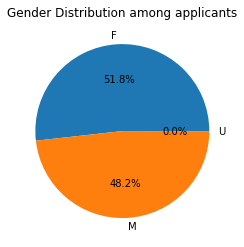

In [107]:
GENDER = cust_demo.gender.value_counts(normalize=True).rename_axis('gender').reset_index(name='Count')
plt.pie(data=GENDER, x=GENDER.Count, labels=GENDER.gender, autopct='%1.1f%%')
plt.title('Gender Distribution among applicants')

[Text(0, 0.5, 'Age Groups'),
 Text(0.5, 0, 'No of Applicants'),
 Text(0.5, 1.0, 'No of Applicantions vs Age Groups')]

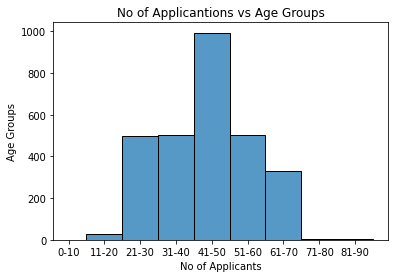

In [110]:
AGE = cust_demo.Age_Group
sns.histplot(AGE).set(xlabel='No of Applicants', ylabel='Age Groups', title='No of Applicantions vs Age Groups')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Count
Manufacturing,695
Financial Services,682
Health,542
Retail,304
Property,231
IT,127
Entertainment,122
Argiculture,99
Telecommunications,61


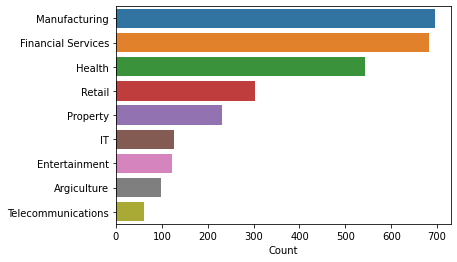

In [125]:
JOB = cust_demo.job_industry_category.value_counts().to_frame('Count')
sns.barplot(JOB.Count,JOB.index,orientation='horizontal')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


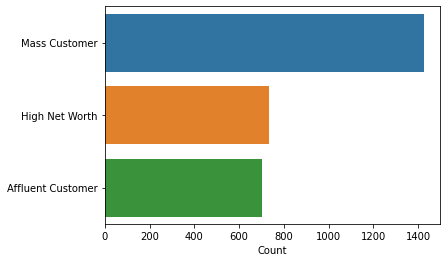

In [126]:
WEALTH = cust_demo.wealth_segment.value_counts().to_frame('Count')
sns.barplot(WEALTH.Count,WEALTH.index,orientation='horizontal')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


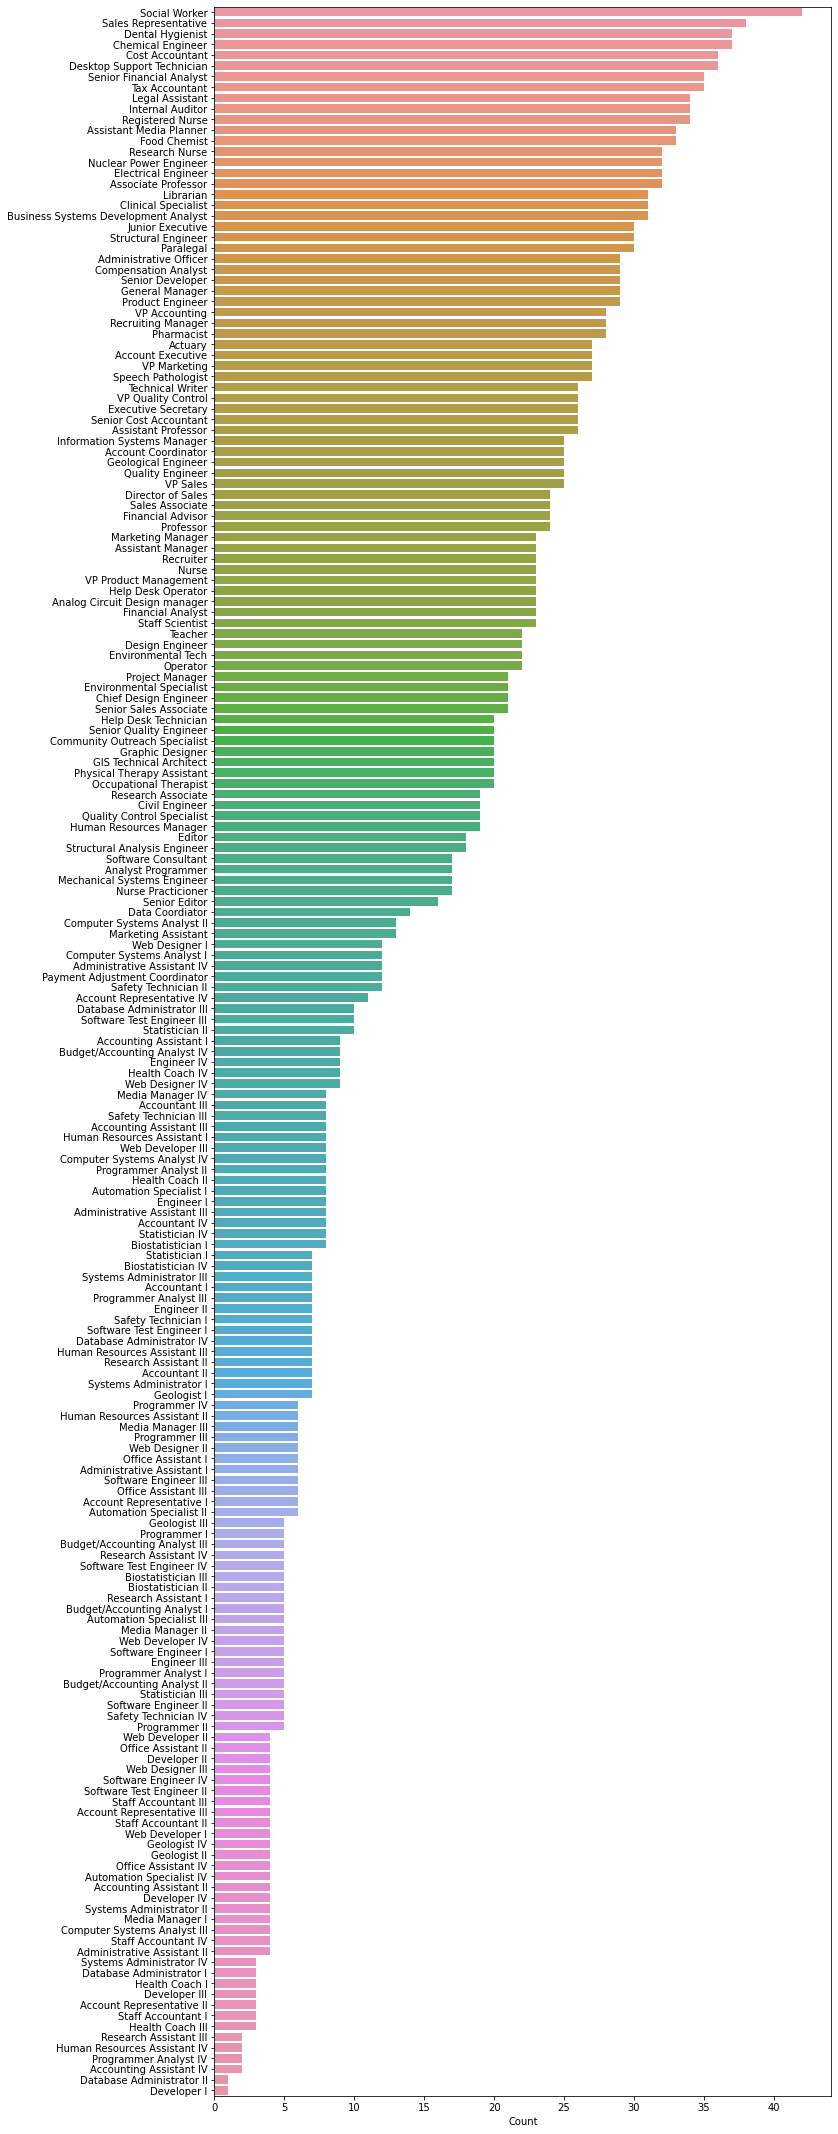

In [129]:
plt.figure(figsize=(12,30))
WEALTH = cust_demo.job_title.value_counts().to_frame('Count')
sns.barplot(WEALTH.Count,WEALTH.index,orientation='horizontal')
plt.tight_layout(2.0)

[Text(0, 0.5, 'Age Groups'),
 Text(0.5, 0, 'No of Applicants'),
 Text(0.5, 1.0, 'No of Applicantions vs Age Groups')]

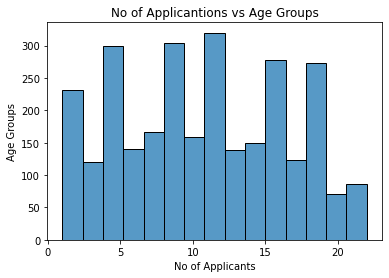

In [143]:
AGE = cust_demo.tenure
sns.histplot(AGE).set(xlabel='No of Applicants', ylabel='Age Groups', title='No of Applicantions vs Age Groups')
